In [58]:
#Social Media Analytics for Business Intelligence - Individual Assignment (DAT - 9731, BOS1)

In [59]:
import pandas as pd #importing library from pandas

In [60]:
import numpy as np #importing numpy array

In [61]:
import matplotlib.pyplot as plt #importing matplotlib

In [62]:
pip install nltk #installting nltk

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install tensorflow #installing tensorflow for keras

Note: you may need to restart the kernel to use updated packages.


In [64]:
fb=pd.read_csv(r'C:\Users\hp\Desktop\Hult Boston\Social Media Analytics\fb_sentiment.csv') #reading the csv file

In [65]:
fb.head() #reading first five rows from table

,Unnamed: 0,FBPost,Label
0,0,Drug Runners and a U.S. Senator have somethin...,O
1,1,"Heres a single, to add, to Kindle. Just read t...",O
2,2,If you tire of Non-Fiction.. Check out http://...,O
3,3,Ghost of Round Island is supposedly nonfiction.,O
4,4,Why is Barnes and Nobles version of the Kindle...,N


In [66]:
# lower-casing the coloumn names
fb.columns=map(str.lower, fb.columns)

In [67]:
# checkin the shape of the DF
fb.shape

(1000, 3)

In [68]:
#lowercasing the text and removing symbols though RegEx
import re
fb['fbpost'] = fb['fbpost'].apply(lambda x: x.lower())
fb['fbpost'] = fb['fbpost'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
fb = fb[fb.label != "O"]
max_fatures = 2000

In [69]:
import nltk.data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
pip install mosestokenizer 

Note: you may need to restart the kernel to use updated packages.


In [71]:
from mosestokenizer import MosesTokenizer, MosesDetokenizer

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
import re
fb['fbpost'] = fb['fbpost'].apply(lambda x: x.lower())
fb['fbpost'] = fb['fbpost'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
fb = fb[fb.label != "O"]
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(fb['fbpost'].values)
X = tokenizer.texts_to_sequences(fb['fbpost'].values)
X = pad_sequences(X)
fb.label.value_counts()
Y = pd.get_dummies(fb['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
#Here the lables are checked after the removal of the "other" sentimented comments. 
#Also some preperation to the algorithm, as preparing the test-, and training sets are done.
print(X_train.shape,Y_train.shape) 
print(X_test.shape,Y_test.shape)
#The Neural Network
#In this section, the algorithm is prepared with following features:
#The model is Sequential
#The model type is an LSTM model
embed_dim = 200
lstm_out = 200

(482, 203) (482, 2)
(238, 203) (238, 2)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 203, 200)          400000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 203, 200)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 721,202
Trainable params: 721,202
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/7
16/16 - 40s - loss: 0.4908 - accuracy: 0.8693
Epoch 2/7
16/16 - 30s - loss: 0.3254 - accuracy: 0.8963
Epoch 3/7
16/16 - 30s - loss: 0.3172 - accuracy: 0.8963
Epoch 4/7
16/16 - 31s - loss: 0.2341 - accuracy: 0.8983
Epoch 5/7
16/16 -

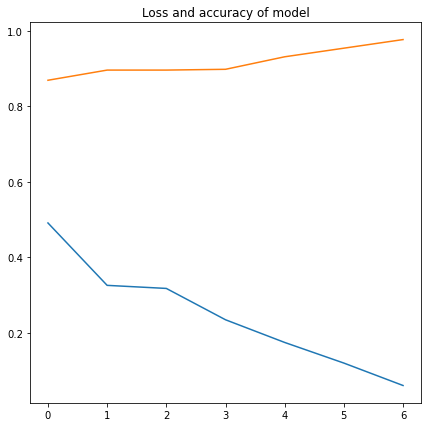

8/8 [==============================] - 5s 323ms/step - loss: 0.3633 - accuracy: 0.8782
score: 0.36
accuracy: 0.88


In [78]:
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())
# Here we train the model
batch_size = 32
hist = model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)
#Plotting a histogram over the 7 epocs and plotting the accuracy and loss
history = pd.DataFrame(hist.history)
plt.figure(figsize=(7,7));
plt.plot(history["loss"]);
plt.plot(history["accuracy"]);
plt.title("Loss and accuracy of model");
plt.show();
#Testing the model, and retrieveing score and accuracy:
score,accuracy = model.evaluate(X_test,Y_test)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (accuracy))
#now we validate for the models accuracy in predicting either a positive, or a negative score:
validation_size = 1500

In [79]:
X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
x_test = X_test[:-validation_size]
y_test = Y_test[:-validation_size]

In [80]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    result = model.predict(X_validate[x].reshape(1,x_test.shape[1]),verbose = 2)[0]
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1
print("positive_acc", pos_correct/pos_cnt*100, "%")
print("negative_acc", neg_correct/neg_cnt*100, "%")
#now testing  on a random sample from the Facebook comments on

1/1 - 2s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1

In [81]:
cmnt = ['your customer service is the absolute worst i now have a mess of books on my kindle']
#vectorizing the comment
cmnt = tokenizer.texts_to_sequences(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)
print(cmnt)
sentiment = model.predict(cmnt,batch_size=2,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  51 510 674  12   2 895   1  69  11   6
   13  16  20   3   4]]
1/1 - 0s
positive
